# Welcome to CS 5242 **Homework 4** Solution

ASSIGNMENT DEADLINE ⏰ : **19 Sept 2022** 

In this assignment, we have three parts:

1. Implement some functions in CNNs from scratch *(3 Points)*
2. Implement a CNN and train for CIFAR10 using PyTorch *(5 Points)*
3. Discussion (parametes and flops for AlexNet) *(2 Points)*

Colab is a hosted Jupyter notebook service that requires no setup to use, while providing access free of charge to computing resources including GPUs. In this semester, we will use Colab to run our experiments.

> In this assignment, We **need GPU** to training the CNN model. You may need to **choose GPU in Runtime -> Change runtime type -> Hardware accerator**

### **Grades Policy**

We have 10 points for this homework. 15% off per day late, 0 scores if you submit it 7 days after the deadline.

### **Cautions**

**DO NOT** use external libraries like PyTorch or TensorFlow in your implementation.

**DO NOT** copy the code from the internet, e.g. GitHub.

---

### **Contact**

Please feel free to contact us if you have any question about this homework or need any further information.

Slack (Recommend): Shenggan Cheng

TA Email: shenggan@comp.nus.edu.sg

> If you have not join the slack group, you can click [here](https://join.slack.com/t/cs5242ay20222-oiw1784/shared_invite/zt-1eiv24k1t-0J9EI7vz3uQmAHa68qU0aw)

## Setup

Start by running the cell below to set up all required software.

In [ ]:
!pip install numpy matplotlib torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import the neccesary library and fix seed for Python, NumPy and PyTorch.

In [ ]:
import math
import random

import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

Now let's setup the GPU environment. The colab provides a free GPU to use. Do as follows:

- Runtime -> Change Runtime Type -> select `GPU` in Hardware accelerator
- Click `connect` on the top-right

After connecting to one GPU, you can check its status using `nvidia-smi` command.

In [ ]:
!nvidia-smi

torch.cuda.is_available()

Mon Sep 26 09:25:40 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     8W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

True

Everything is ready, you can move on and ***Good Luck !*** 😃

## Implement functions in CNNs from scratch

In this section, you need to implement some functions commonly used in CNNs, including convolution, pooling, etc. 

We will compare the computational results of your implemented version with those of pytorch, expecting that the error between the correct implementation and pytorch will be very small.

NOTE: 

1. Implement these functions from scratch, **without** using any neural network libraries. Use linear algebra libraries in python is ok.

2. The performance of the function is not included in this scoring, You just need to pay attention to the correctness of your implementation.

### Step 1
Given a 32x32 pixels, 3 channels input, get a torch tensor with torch.randn().

In [ ]:
batch_size = 2
x = torch.randn(batch_size, 3, 32, 32)

### Step 2

For each following functions in the list, get the output tensor "torch_xxx_out" with input as x:

In [ ]:
torch_max_pool = nn.MaxPool2d(kernel_size=2,
                              stride=1,
                              padding=0,
                              dilation=1,
                              return_indices=False,
                              ceil_mode=False)
torch_avg_pool = nn.AvgPool2d(kernel_size=2,
                              stride=1,
                              padding=0,
                              ceil_mode=False,
                              count_include_pad=True,
                              divisor_override=None)
torch_conv = nn.Conv2d(in_channels=3,
                       out_channels=6,
                       kernel_size=3,
                       stride=1,
                       padding=0,
                       dilation=1,
                       groups=1,
                       bias=True,
                       padding_mode='zeros')
torch_norm = nn.BatchNorm2d(3)

In [ ]:
torch_sigmoid_out = torch.sigmoid(x, out=None)
tmp_tensor = torch.randint(3, (batch_size,))
torch_cross_entropy_out = F.cross_entropy(x[::, ::, 0, 0], tmp_tensor)

In [ ]:
torch_max_pool_out = torch_max_pool(x)
torch_avg_pool_out = torch_avg_pool(x)
torch_conv_out = torch_conv(x)
torch_norm_out = torch_norm(x)

### Step 3

Implement these functions from scratch, without using any neural network libraries. Use linear algebra libraries in python is ok. Output your tensors as "my_xxx_out".

In [ ]:
def my_max_pool(x, kernel_size, stride, padding):
    """
    Args:
        x: torch tensor with size (N, C_in, H_in, W_in),
        kernel_size: size of the window to take a max over, 
        stride: stride of the window,
        padding: implicit zero padding to be added on both sides,
        
    Return:
        y: torch tensor of size (N, C_out, H_out, W_out).
    """

    y = None
    # === Complete the code (0.5')

    if padding > 0:
        x_padding = torch.zeros(x.shape[0], x.shape[1], x.shape[2] + 2 * padding,
                                x.shape[3] + 2 * padding) - float('inf')
        x_padding[:, :, padding:-padding, padding:-padding] = x
    else:
        x_padding = x

    output_width = int((x_padding.shape[2] - kernel_size) / stride) + 1
    output_height = int((x_padding.shape[3] - kernel_size) / stride) + 1
    output = np.zeros((x_padding.shape[0], x_padding.shape[1], output_width, output_height))
    for b in range(x_padding.shape[0]):
        for c in range(x_padding.shape[1]):
            for h in range(output_height):
                for w in range(output_width):
                    output[b, c, h, w] = np.max(x_padding[b, c, h*stride:h*stride + kernel_size,
                                                  w*stride:w*stride + kernel_size].numpy())
    y = torch.from_numpy(output)

    # === Complete the code
    return y

In [ ]:
def my_avg_pool(x, kernel_size, stride, padding):
    """
    Args:
        x: torch tensor with size (N, C_in, H_in, W_in),
        kernel_size: size of the window, 
        stride: stride of the window,
        padding: implicit zero padding to be added on both sides,
        
    Return:
        y: torch tensor of size (N, C_out, H_out, W_out).
    """

    y = None
    # === Complete the code (0.5')

    if padding > 0:
        x_padding = torch.zeros(x.shape[0], x.shape[1], x.shape[2] + 2 * padding,
                                x.shape[3] + 2 * padding)
        x_padding[:, :, padding:-padding, padding:-padding] = x
    else:
        x_padding = x

    output_width = int((x_padding.shape[2] - kernel_size) / stride) + 1
    output_height = int((x_padding.shape[3] - kernel_size) / stride) + 1
    output = np.zeros((x_padding.shape[0], x_padding.shape[1], output_width, output_height))
    for b in range(x_padding.shape[0]):
        for c in range(x_padding.shape[1]):
            for h in range(output_height):
                for w in range(output_width):
                    output[b, c, h, w] = np.mean(x_padding[b, c, h*stride:h*stride + kernel_size,
                                                  w*stride:w*stride + kernel_size].numpy())
    y = torch.from_numpy(output)

    # === Complete the code
    return y

In [ ]:
def my_conv(x, in_channels, out_channels, kernel_size, stride, padding, weight, bias):
    """
    Args:
        x: torch tensor with size (N, C_in, H_in, W_in),
        in_channels: number of channels in the input image, it is C_in;
        out_channels: number of channels produced by the convolution;
        kernel_size: size of onvolving kernel, 
        stride: stride of the convolution,
        padding: implicit zero padding to be added on both sides of each dimension,
        
    Return:
        y: torch tensor of size (N, C_out, H_out, W_out)
    """

    y = None
    # === Complete the code (0.5')

    if padding > 0:
        x_padding = torch.zeros(x.shape[0], x.shape[1], x.shape[2] + 2 * padding,
                                x.shape[3] + 2 * padding)
        x_padding[:, :, padding:-padding, padding:-padding] = x
    else:
        x_padding = x
  
    output_width = int((x_padding.shape[2] - kernel_size) / stride) + 1
    output_height = int((x_padding.shape[3] - kernel_size) / stride) + 1
    output = np.zeros((x.shape[0], out_channels, output_width, output_height))

    for b in range(x.shape[0]):
        for i in range(out_channels):
            for w in range(0, output_height):
                for h in range(0, output_width):
                    for k in range(x.shape[1]):
                        output[b, i, w, h] += np.sum(
                            (x_padding[b, k, w*stride:w*stride + kernel_size, h*stride:h*stride + kernel_size] *
                             weight[i, k]).detach().numpy())
                    output[b, i, w, h] += bias[i]

    y = torch.from_numpy(output)
    # === Complete the code
    return y

In [ ]:
def my_batchnorm(x, num_features, eps):
    """
    Args:
        x: torch tensor with size (N, C, H, W),
        num_features: number of features in the input tensor, it is C;
        eps: a value added to the denominator for numerical stability. Default: 1e-5
        
    Return:
        y: torch tensor of size (N, C, H, W)
    """

    y = torch.empty_like(x)
    # === Complete the code (0.5')
    for c in range(x.shape[1]):
        running_mean = np.mean(x[:, c, :, :].numpy())
        running_var = np.var(x[:, c, :, :].numpy())
        for b in range(x.shape[0]):
            for h in range(x.shape[2]):
                for w in range(x.shape[3]):
                    y[b, c, h, w] = (x[b, c, h, w] - running_mean) / np.sqrt(running_var + eps)

    # === Complete the code
    return y

In [ ]:
def my_sigmoid(x):
    """
    Args:
        x: torch tensor with any size

    Return:
        y: the logistic sigmoid function of x
    """
    y = None
    # === Complete the code (0.5')
    y = 1 / (1 + np.exp(-x))
    # === Complete the code
    return y

In [ ]:
def my_cross_entropy(p, y):
    """
    Args:
        p: torch tensor with size of (N, C),
        y (int): torch tensor with size of (N), the values range from 0 to C-1

    Return:
        loss: the cross_entropy of predicted values p and target y.
    """
    loss = None
    # === Complete the code (0.5')
    # log_softmax
    log_softmax = torch.empty_like(p)
    for i in range(p.shape[0]):
        p_exp = np.exp(p[i].numpy())
        p_exp_sum = np.sum(p_exp, axis=0)
        soft = p_exp / p_exp_sum
        log_softmax[i] = torch.from_numpy(-1 * np.log(soft))
    # loss
    loss_ = torch.zeros([len(log_softmax)])
    for i in range(log_softmax.shape[0]):
        loss_[i] = log_softmax[i, y[i]]
    loss = loss_.mean()
    # === Complete the code
    return loss

In [ ]:
my_max_pool_out = my_max_pool(x, kernel_size=2, stride=1, padding=0)
my_avg_pool_out = my_avg_pool(x, kernel_size=2, stride=1, padding=0)
my_conv_out = my_conv(x,
                      in_channels=3,
                      out_channels=6,
                      kernel_size=3,
                      stride=1,
                      padding=0,
                      weight=torch_conv.weight,
                      bias=torch_conv.bias)
my_norm_out = my_batchnorm(x, num_features=3, eps=1e-5)

In [ ]:
my_sigmoid_out = my_sigmoid(x)
my_cross_entropy_out = my_cross_entropy(x[::, ::, 0, 0], tmp_tensor)

### Step 4

Compare and show that "torch_xxx_out" and "my_xxx_out" are equal up to small numerical errors.

In [ ]:
print(F.mse_loss(my_max_pool_out, torch_max_pool_out))
print(F.mse_loss(my_avg_pool_out, torch_avg_pool_out))
print(F.mse_loss(my_conv_out, torch_conv_out))
print(F.mse_loss(my_norm_out, torch_norm_out))

tensor(0., dtype=torch.float64)
tensor(0., dtype=torch.float64)
tensor(4.9331e-15, dtype=torch.float64, grad_fn=<MseLossBackward0>)
tensor(2.9662e-15, grad_fn=<MseLossBackward0>)


In [ ]:
print(F.mse_loss(my_sigmoid_out, torch_sigmoid_out))
print(F.mse_loss(my_cross_entropy_out, torch_cross_entropy_out))

tensor(3.6253e-16)
tensor(0.)


## Train CNNs on CIFAR-10 dataset

Implement a CNN and train for CIFAR10 with these definitions:

1. cA-B = Conv2d with input A channels, output B channels - kernel size 3x3, stride (1,1), padding with zeros to keep image size constant, followed by ReLU;

2. mp = maxpool2d kernel size 2x2, stride (2,2);

3. bn = batchnorm2d with affine=False (i.e. non learning batch norm);

4. fcA-B = nn.linear with input A nodes, output B nodes;

5. aap = adaptive average pooling.

Use the definition to make the architecture c3-16 -> c16-16 -> mp -> c16-32 -> c32-32 -> mp -> c32-64 -> c64-64 -> mp -> c64-128 -> c128-128 -> aap -> flatten -> fc128-10 -> cross entropy loss. Adjust learning rate, batch size and other hyper parameters to make classification results > 75%.

In [ ]:
# === Complete the code (1')
num_epoch = 20 # TODO: please define the number of epoch here.
batch_size = 64 # TODO: please fill the batch size here.
# === Complete the code

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data',
                                        train=True,
                                        download=True,
                                        transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          num_workers=1)

testset = torchvision.datasets.CIFAR10(root='./data',
                                       train=False,
                                       download=True,
                                       transform=transform)
testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=batch_size,
                                         shuffle=False,
                                         num_workers=1)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
# debug --> get input data size
trainset[0][0].size()

torch.Size([3, 32, 32])

In [ ]:
# Creating a CNN model
class CNN(nn.Module):
    
    def __init__(self, num_classes):
        super(CNN, self).__init__()
       
        # === Complete the code (1.5')
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1) # 32 x 16 x 16
        self.conv4 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1) 
        self.conv5 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1) # 64 x 8 x 8
        self.conv6 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1) 
        self.conv7 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1) # 128 x 4 x 4
        self.conv8 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1) # 128 x 4 x 4

        self.aap = nn.AdaptiveAvgPool2d((1, 1)) # 128 x 1 x 1
        self.flatten =  nn.Flatten(start_dim=1, end_dim=-1) # 128 
        self.fc = nn.Linear(128, num_classes) # 10
        
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.relu = nn.ReLU()

        # === Complete the code
        
    def forward(self, x):
        # === Complete the code (1.5')
        x1 = self.relu(self.conv1(x)) # initially input is N x 3 x 32 x 32, where N is the batch_size
        x2 = self.relu(self.conv2(x1))
        x2_p = self.maxpool(x2) # now becomes N x 16 x 16 x 16
        x3 = self.relu(self.conv3(x2_p))
        x4 = self.relu(self.conv4(x3))
        x4_p = self.maxpool(x4) # now becomes N x 32 x 8 x 8
        x5 = self.relu(self.conv5(x4_p))
        x6 = self.relu(self.conv6(x5))
        x6_p = self.maxpool(x6) # now becomes N x 64 x 4 x 4
        x7 = self.relu(self.conv7(x6_p))
        x8 = self.relu(self.conv8(x7))
        x = self.aap(x8) # now becomes N x 128 x 1 x 1
        x = self.flatten(x) # N x128
        out = self.fc(x)
        # === Complete the code
        return out

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = CNN(10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)

In [ ]:
for epoch in range(num_epoch):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):

        inputs, labels = data[0].to(device), data[1].to(device)
        # === Complete the code (1')
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # === Complete the code

        running_loss += loss.item()
        if (i + 1) % 128 == 0:
            print('epoch {:3d} | {:5d} batches loss: {:.4f}'.format(epoch, i + 1, running_loss/128))
            running_loss = 0.0

print('Finished Training')

epoch   0 |   128 batches loss: 2.1141
epoch   0 |   256 batches loss: 1.9330
epoch   0 |   384 batches loss: 1.8620
epoch   0 |   512 batches loss: 1.7758
epoch   0 |   640 batches loss: 1.6934
epoch   0 |   768 batches loss: 1.6152
epoch   1 |   128 batches loss: 1.5616
epoch   1 |   256 batches loss: 1.5417
epoch   1 |   384 batches loss: 1.4938
epoch   1 |   512 batches loss: 1.4693
epoch   1 |   640 batches loss: 1.4302
epoch   1 |   768 batches loss: 1.4216
epoch   2 |   128 batches loss: 1.3928
epoch   2 |   256 batches loss: 1.3423
epoch   2 |   384 batches loss: 1.3177
epoch   2 |   512 batches loss: 1.3131
epoch   2 |   640 batches loss: 1.2878
epoch   2 |   768 batches loss: 1.2606
epoch   3 |   128 batches loss: 1.2365
epoch   3 |   256 batches loss: 1.1990
epoch   3 |   384 batches loss: 1.1874
epoch   3 |   512 batches loss: 1.1579
epoch   3 |   640 batches loss: 1.1475
epoch   3 |   768 batches loss: 1.1276
epoch   4 |   128 batches loss: 1.0997
epoch   4 |   256 batches

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        #images, labels = data
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 77 %


## Discussion (2 points)

Calculate Parameters and FLOPs(Floating point operations) of **AlexNet** and analyse the ratio of the number of parameters and the amount of calculations for different layers in AlexNet.

Hint:

1. You can refer https://pytorch.org/vision/stable/_modules/torchvision/models/alexnet.html for architecture of AlexNet.
2. You only need to make estimates and do not need to perform rigorous calculations, (e.g. only consider the FLOPs of the convolution and FC in AlexNet model)
3. Because Multiply Accumulate (MAC) operations are performed on the hardware, it is possible to simply consider only the number of multiplications when considering the number of operations when calculating FLOPs.

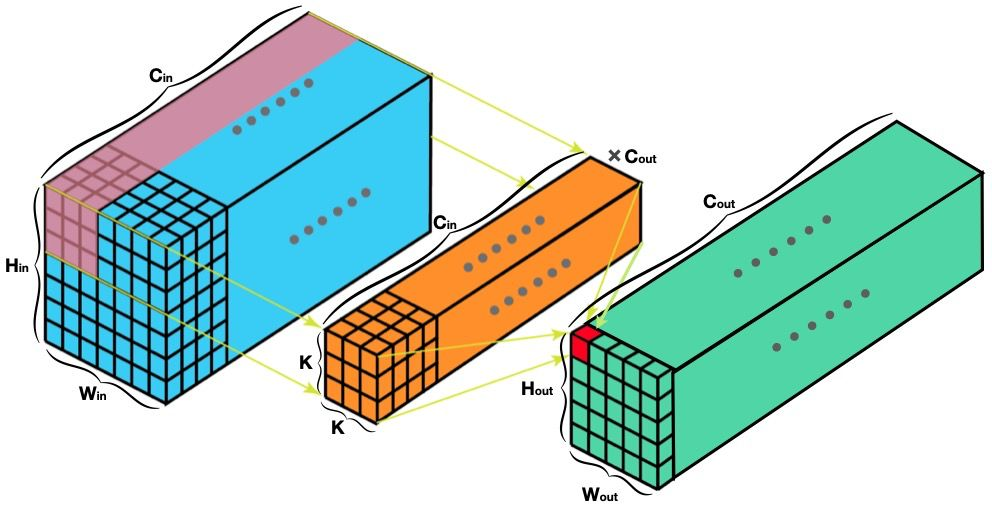

### Convolution Layer

Parameters: $K \times K \times C_{in} \times C_{out}$

FLOPs: $K \times K \times C_{in} \times C_{out} \times H_{out} \times W_{out}$

### Fully Connected Layer

Parameters: $C_{in} \times C_{out}$

FLOPs: $C_{in} \times C_{out}$

| Type   | K  | Stride | Output (HxW) | $C_{out}$ | Params   | FLOPs     |
|--------|----|--------|--------------|-----------|----------|-----------|
| input  |    |        | 224x224      | 3         |          |           |
| conv_1 | 11 | 4      | 55x55        | 64        | 23232    | 70276800  |
| pool_1 | 3  | 2      | 27*27        | 64        |          |           |
| conv_2 | 5  | 1      | 27x27        | 192       | 307200   | 223948800 |
| pool_2 | 3  | 2      | 13x13        | 192       |          |           |
| conv_3 | 3  | 1      | 13x13        | 384       | 663552   | 112140288 |
| conv_4 | 3  | 1      | 13x13        | 256       | 884736   | 149520384 |
| conv_5 | 3  | 1      | 13x13        | 256       | 589824   | 99680256  |
| pool_3 | 3  | 2      | 6x6          | 256       |          |           |
| fc_1   |    |        |              | 4096      | 37748736 | 37748736  |
| fc_2   |    |        |              | 4096      | 16777216 | 16777216  |
| fc_3   |    |        |              | 1000      | 4096000  | 4096000   |
| Total  |    |        |              |           | 61090496 | 714188480 |

The number of parameters has a large percentage in FC Layer, and the FLOPs has a large percentage in convolution layer.



---



You can use some flops-counter tools to validate our answer: https://github.com/sovrasov/flops-counter.pytorch#benchmark